# Moving Averages

In [1]:
from mgl_efis_plotter import *
import pandas as pd

In [2]:
flights = create_flights('IEFIS.REC', Config)
for i in range(0, len(flights)):
    print(i, flights[i])

0 Flight at 2019-05-12 11:47:58 to 2019-05-12 12:07:22,   3,100 messages
1 Flight at 2019-05-12 12:07:23 to 2019-05-12 12:29:11,   6,276 messages
2 Flight at 2019-05-12 16:47:23 to 2019-05-12 17:28:25,   10,986 messages
3 Flight at 2019-05-12 11:47:58 to 2019-05-12 11:47:58,   7 messages


## Flight 3

In [3]:
p = Plot(flights[2])
xlim = (18, 23)
ylim = (50, 125)

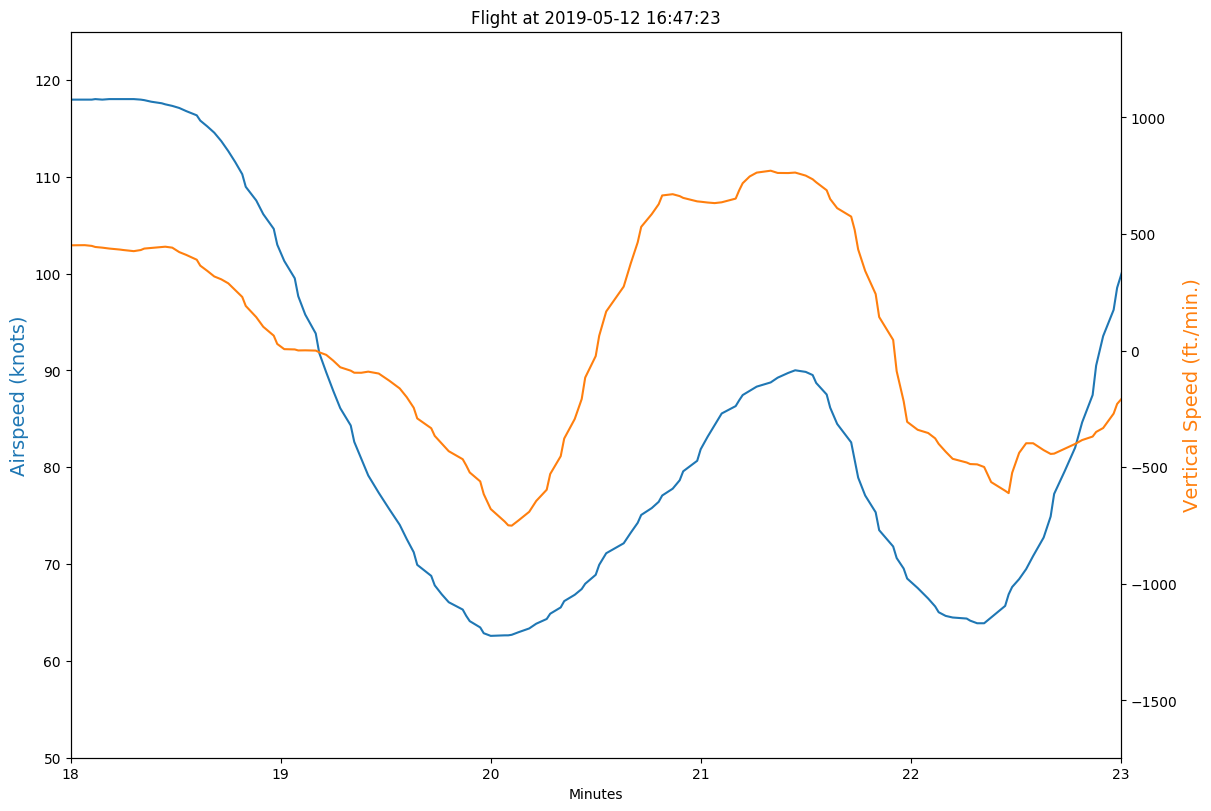

In [4]:
Config.rolling_window = 16
p.plot2(['asi', 'vsi'], ['Airspeed (knots)', 'Vertical Speed (ft./min.)'], xlim=xlim, ylim=ylim).show()

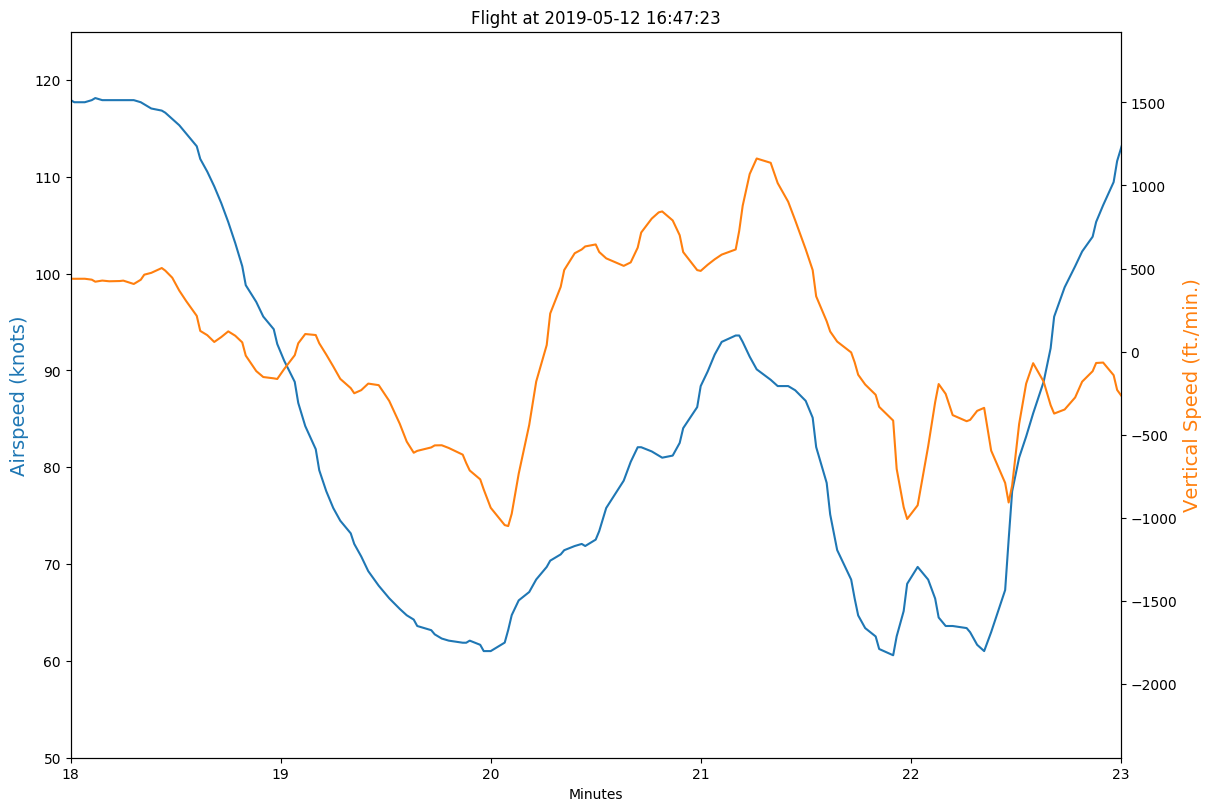

In [9]:
Config.rolling_window = 4
p.plot2(['asi', 'vsi'], ['Airspeed (knots)', 'Vertical Speed (ft./min.)'], xlim=xlim, ylim=ylim).show()

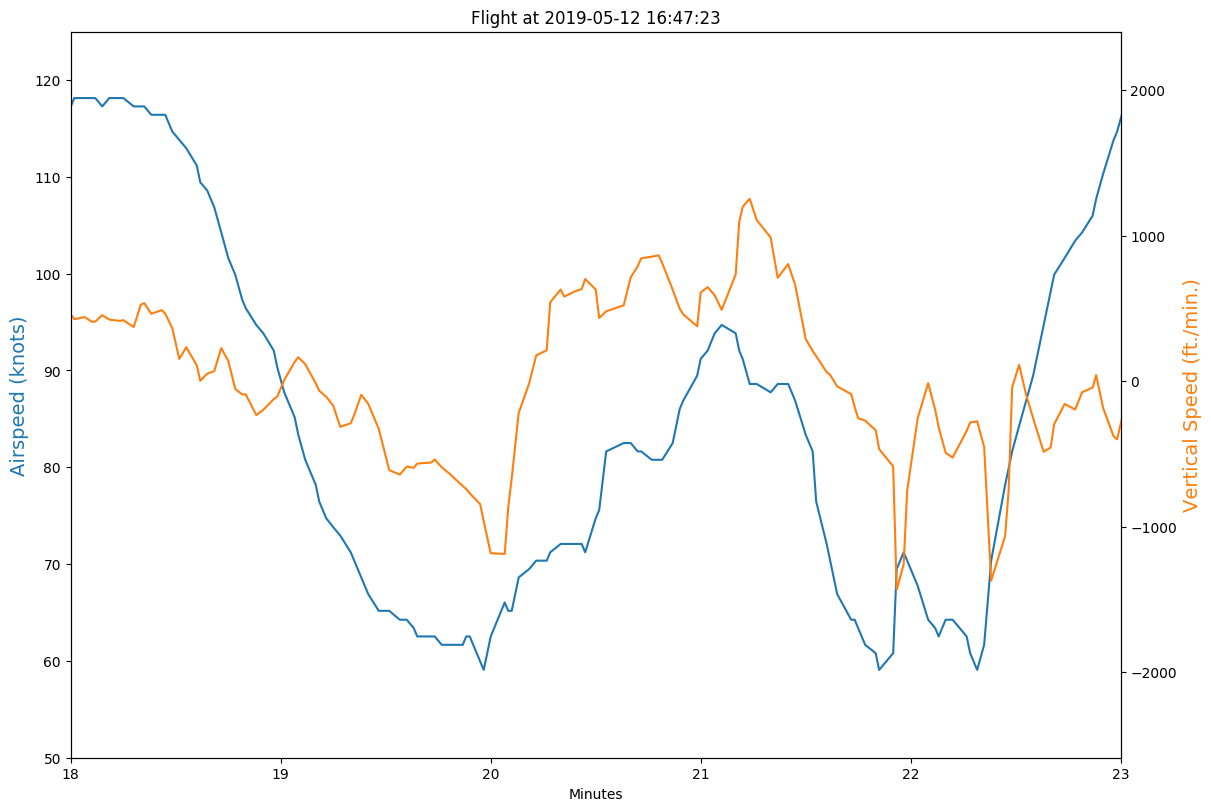

In [5]:
Config.rolling_window = 1
p.plot2(['asi', 'vsi'], ['Airspeed (knots)', 'Vertical Speed (ft./min.)'], xlim=xlim, ylim=ylim).show()

## Rolling Average with a 4-Sample Window

In [6]:
asi_data = p.flight.list_data('asi')
asi = pd.DataFrame(asi_data, index=asi_data['minutes'], columns=['asi'])

asi = asi.loc[~asi.index.duplicated(keep='first')]

a = asi.loc[21.5:22.4]
r = a.rolling(4, min_periods=1).mean().add_suffix('_rolling_average')
a.head(10)

,asi
21.500000,86.015119
21.533333,81.641469
21.550000,79.913607
21.600000,74.730022
21.616667,70.356371
21.650000,69.492441
21.716667,65.172786
21.733333,64.254860
21.750000,63.390929
21.783333,62.526998


In [7]:
both = pd.concat([a, r], axis=1)
both.head(10).to_csv('rolling-window-4.csv')
both.head(10)

,asi,asi_rolling_average
21.500000,86.015119,86.015119
21.533333,81.641469,83.828294
21.550000,79.913607,82.523398
21.600000,74.730022,80.575054
21.616667,70.356371,76.660367
21.650000,69.492441,73.623110
21.716667,65.172786,69.937905
21.733333,64.254860,67.319114
21.750000,63.390929,65.577754
21.783333,62.526998,63.836393


## Rolling Average with a 16-Sample Window

In [8]:
asi_data = p.flight.list_data('asi')
asi = pd.DataFrame(asi_data, index=asi_data['minutes'], columns=['asi'])

r = a.rolling(16, min_periods=1).mean().add_suffix('_rolling_average')
both = pd.concat([a, r], axis=1)
both.to_csv('rolling-window-16.csv')
both

,asi,asi_rolling_average
21.500000,86.015119,86.015119
21.533333,81.641469,83.828294
21.550000,79.913607,82.523398
21.600000,74.730022,80.575054
21.616667,70.356371,78.531317
21.650000,69.492441,77.024838
21.716667,65.172786,75.331688
21.733333,64.254860,73.947084
21.750000,63.390929,72.774178
21.783333,62.526998,71.749460
